In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Problem 1.3

1. The average test accuracy for inner_update_lr=0.04 is 0.8863317.
2. The average test accuracy for inner_update_lr=0.4 is 0.91966504.
3. The average test accuracy for inner_update_lr=4 is 0.26799902.
4. The plot below shows the validation accuracy over iterations.
5. Different inner_update_lr influence the meta learning process. If it's too small, the learning process would be slow and cannot achieve the optimal results with certain iterations; if it's too big, the inner loop updates will be divergent or oscillating, which means the model cannot learn from the input data, and then the outer loop cannot update the original initial model parameters.   

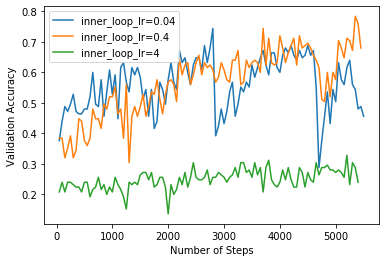

In [115]:
df131 = pd.read_csv('result_cls_5.mbs_25.k_shot_1.inner_numstep1.inner_updatelr0.04maml_meta_val_acc.csv')
df132 = pd.read_csv('result_cls_5.mbs_25.k_shot_1.inner_numstep1.inner_updatelr0.4maml_meta_val_acc.csv')
df133 = pd.read_csv('result_cls_5.mbs_25.k_shot_1.inner_numstep1.inner_updatelr4.0maml_meta_val_acc.csv')
# df131.head()
plt.figure()
plt.xlabel('Number of Steps')
plt.ylabel('Validation Accuracy')
plt.plot(df131['iter'], df131['meta-validation post-inner-loop accuracy'],
label='inner_loop_lr=0.04')
plt.plot(df132['iter'], df132['meta-validation post-inner-loop accuracy'],
label='inner_loop_lr=0.4')
plt.plot(df133['iter'], df133['meta-validation post-inner-loop accuracy'],
label='inner_loop_lr=4')
plt.legend()
plt.savefig('plots_comparison_with_diff_inner_loop_lr.png')
plt.show()

# Problem 1.4

Compared with the MAML with fixed inner_update_lr, the model with trainable inner_update_lr is more stable and can faster converge?

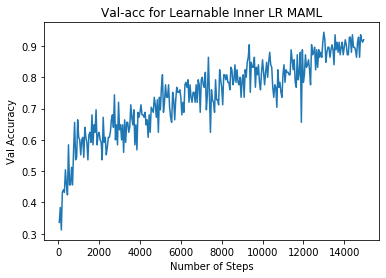

<Figure size 432x288 with 0 Axes>

In [84]:
df14 = pd.read_csv('result_cls_5.mbs_25.k_shot_1.inner_numstep1.inner_updatelr0.0maml_meta_val_acc.csv')
# df14.head()
plt.figure()
plt.xlabel('Number of Steps')
plt.ylabel('Val Accuracy')
plt.plot(df14['iters'], df14['meta_val_post-inner_acc'])
plt.title('Val-acc for Learnable Inner LR MAML')
plt.show()
plt.savefig('Learnable_Inner_LR_MAML.png')

# Problem 2.3
The average meta-test accuracy is 0.93443, and meta-test accuracy std is 0.02967.
The plot below shows the validation accuracy over iterations.

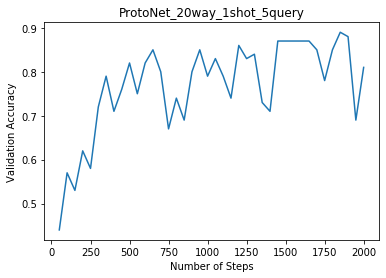

<Figure size 432x288 with 0 Axes>

In [110]:
df231 = pd.read_csv('result_proto_meta_val_acc_n_way20_k_shot1_n_query5.csv')
df231['iter'] = [50 * i for i in range(1, 41)]
# df231.head()               
plt.figure()
plt.xlabel('Number of Steps')
plt.ylabel('Validation Accuracy')
plt.plot(df231['iter'], df231['meta-val accuracy'])
plt.title('ProtoNet_20way_1shot_5query')
plt.show()
plt.savefig('plot_ProtoNet_20way_1shot_5query.png')

# Problem 3

In [76]:
result_protonet = [{'meta_test_K': 4, 'avg_acc': 0.95560}, {'meta_test_K': 6, 'avg_acc': 0.96310},
                   {'meta_test_K': 8, 'avg_acc': 0.96372}, {'meta_test_K': 10, 'avg_acc': 0.96902}]
df_protonet = pd.DataFrame(data=result_protonet, columns=['meta_test_K', 'avg_acc'])
# df_protonet
result_maml = [{'meta_test_K': 4, 'avg_acc': 0.9553349}, {'meta_test_K': 6, 'avg_acc': 0.9517222},
               {'meta_test_K': 8, 'avg_acc': 0.9556673}, {'meta_test_K': 10, 'avg_acc': 0.9572341}]
df_maml = pd.DataFrame(data=result_maml, columns=['meta_test_K', 'avg_acc'])
# df_maml
df_result = pd.merge(df_protonet, df_maml, on='meta_test_K', suffixes=('_protonet', '_maml'))
df_result.set_index('meta_test_K', inplace=True)
df_result

,avg_acc_protonet,avg_acc_maml
meta_test_K,,
4,0.95560,0.955335
6,0.96310,0.951722
8,0.96372,0.955667
10,0.96902,0.957234


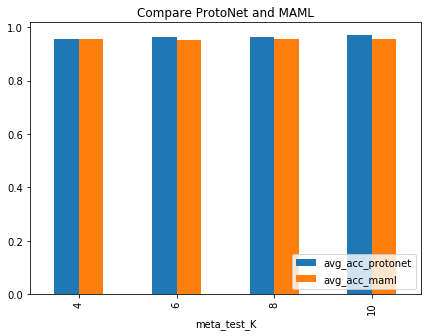

In [114]:
df_result.plot.bar(figsize=(7,5))
plt.legend(loc='lower right')
plt.title('Compare ProtoNet and MAML')
plt.savefig('compare_protonet_maml.png')

In [ ]:
prob 1.3

python run_maml_1.3.py --n_way=5 --k_shot=1 --inner_update_lr=0.4 --num_inner_updates=1 --meta_train=False --meta_test_set=True
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.2826659 , 0.91966504], dtype=float32), array([0.1885903 , 0.12060892], dtype=float32), array([0.01509037, 0.00965072], dtype=float32))


python run_maml_1.3.py --n_way=5 --k_shot=1 --inner_update_lr=0.04 --num_inner_updates=1 --meta_train=False --meta_test_set=True
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.20133224, 0.8863317 ], dtype=float32), array([0.0305215, 0.1463322], dtype=float32), array([0.00244223, 0.01170901], dtype=float32))


python run_maml_1.3.py --n_way=5 --k_shot=1 --inner_update_lr=4 --num_inner_updates=1 --meta_train=False --meta_test_set=True
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.22366625, 0.26799902], dtype=float32), array([0.14482124, 0.11737116], dtype=float32), array([0.01158811, 0.00939165], dtype=float32))



prob 3

python run_ProtoNet_3.py ./omniglot_resized/ --n-way=5 --k-shot=1 --n-query=5 --n-meta-test-way=5 --k-meta-test-shot=4 --n-meta-test-query=4
Average Meta-Test Accuracy: 0.95560, Meta-Test Accuracy Std: 0.05499
        
python run_ProtoNet_3.py ./omniglot_resized/ --n-way=5 --k-shot=1 --n-query=5 --n-meta-test-way=5 --k-meta-test-shot=6 --n-meta-test-query=6
Average Meta-Test Accuracy: 0.96310, Meta-Test Accuracy Std: 0.04477
        
python run_ProtoNet_3.py ./omniglot_resized/ --n-way=5 --k-shot=1 --n-query=5 --n-meta-test-way=5 --k-meta-test-shot=8 --n-meta-test-query=8
Average Meta-Test Accuracy: 0.96372, Meta-Test Accuracy Std: 0.04018

python run_ProtoNet_3.py ./omniglot_resized/ --n-way=5 --k-shot=1 --n-query=5 --n-meta-test-way=5 --k-meta-test-shot=10 --n-meta-test-query=10
Average Meta-Test Accuracy: 0.96902, Meta-Test Accuracy Std: 0.03328

prob 3

python run_maml_1.3.py --n_way=5 --k_shot=4 --inner_update_lr=0.4 --num_inner_updates=1 --meta_train=False --meta_test_set=True --meta_train_k_shot=1
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.27050018, 0.9553349 ], dtype=float32), array([0.1394206 , 0.05653816], dtype=float32), array([0.01115597, 0.00452399], dtype=float32))

python run_maml_1.3.py --n_way=5 --k_shot=6 --inner_update_lr=0.4 --num_inner_updates=1 --meta_train=False --meta_test_set=True --meta_train_k_shot=1
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.2694999, 0.9517222], dtype=float32), array([0.13459592, 0.05594968], dtype=float32), array([0.01076992, 0.00447691], dtype=float32))

python run_maml_1.3.py --n_way=5 --k_shot=8 --inner_update_lr=0.4 --num_inner_updates=1 --meta_train=False --meta_test_set=True --meta_train_k_shot=1
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.2719166, 0.9556673], dtype=float32), array([0.12787057, 0.05042706], dtype=float32), array([0.01023178, 0.004035  ], dtype=float32))

python run_maml_1.3.py --n_way=5 --k_shot=10 --inner_update_lr=0.4 --num_inner_updates=1 --meta_train=False --meta_test_set=True --meta_train_k_shot=1
Mean meta-test accuracy/loss, stddev, and confidence intervals
(array([0.2785998, 0.9572341], dtype=float32), array([0.12995644, 0.04698594], dtype=float32), array([0.01039868, 0.00375966], dtype=float32))
